In [1]:
func_name='real_estate_transaction_price_index_present_condition'

import json
import requests
import xml
import xml.etree.ElementTree as ET
import pandas as pd
from collections import OrderedDict

In [23]:
# params = {"startmonth" : 200001, "endmonth":201805, 'region':11000,'buildingtype':0 }

def getURL(params):
    endpoint = 'http://openapi.kab.co.kr/OpenAPI_ToolInstallPackage/service/rest/TradePrcIndexSvc/getTradePrcIndex'
    serviceKey = "cStdoEdhTJJ%2Fr7pTrgf%2F%2BFORknrV3uTEvHVcrcOjXVnMeNbglltulZ9sJCLSY7zp%2BR3HSAaOGp6GJ041kxTCdQ%3D%3D"

    _params = ''
    for k, v in params.items():
        _params += '&' + k + '=' + str(v)

    URL = endpoint + '?serviceKey=' + serviceKey + _params
    return URL

#def lambda_handler(event, context):
    # TODO implement

In [28]:
def get_data_from_URL(URL, aptTypeCd, list):

    response = requests.get(URL)
    # print(response.text)

    XMLtree = ET.fromstring(response.text)
    # XMLtree.tag

    XMLbody = XMLtree.findall('body')
    XMLitems = XMLbody[0].findall('item')

    dict = {}
    for XMLitem in XMLitems:
        for x in XMLitem.findall("*"):
            dict.update({x.tag : x.text })

    aptTypeNm  = dict.get('aptTypeNm')
    regionCd  = dict.get('regionCd')
    regionNm  = dict.get('regionNm')
    _rsRow =  dict.get('rsRow')

    __rsRow = _rsRow.split('|')

    for _r in __rsRow:
        _ = {}
        month = _r.split(',')[0]
        value = _r.split(',')[1]
        if value == None or value == '':
            _.update({'aptTypeCd':aptTypeCd,   'aptTypeNm':aptTypeNm, 'regionCd': regionCd, 'regionNm':regionNm, 'month': int(month), 'value': None })
        else:
            _.update({'aptTypeCd':aptTypeCd,   'aptTypeNm':aptTypeNm, 'regionCd': regionCd, 'regionNm':regionNm, 'month': int(month), 'value': float(value) })
        list.append(_)
        

In [29]:
df_buildingtype = pd.read_csv('codes - buildingtype.csv', index_col=0)#순번,주택유형,코드
df_region = pd.read_csv('codes - region.csv', index_col=0)#순번,지역,코드

In [30]:
def get_add_data(params, buildingtype_code, list):
    URL = getURL(params)
    get_data_from_URL(URL, buildingtype_code, list)
    

In [36]:
startmonth = 200001
endmonth = 201805

list = []

for index, row in df_buildingtype.iterrows():
    buildingtype_txt = row["주택유형"]
    buildingtype_code = row["코드"]
    
    for index, row in df_region.iterrows():
        region_txt = row["지역"]
        region_code = row["코드"]
        params = {"startmonth" : startmonth, "endmonth":endmonth, 'region':region_code,'buildingtype':buildingtype_code }
        get_add_data(params, buildingtype_code, list)
        print(params)

print('done getting data! ... saving ...')
df = pd.DataFrame(list, index=None)
file_name = func_name + '_'+ str(startmonth) + '_' + str(endmonth)+ '.csv'
df.to_csv(file_name, encoding='utf-8', index=False)
print('saved : ' + file_name)


{'startmonth': 200001, 'endmonth': 201805, 'region': 'A1000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': 'A2000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': 'A2001', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': 'A3000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': 'A5000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': 'A6000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': 'A9000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': '11000', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': '11A01', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': '11A02', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': '11A11', 'buildingtype': 0}
{'startmonth': 200001, 'endmonth': 201805, 'region': '11A12', 'buildingtype': 0}
{'startmonth': 200001, 'endm

{'startmonth': 200001, 'endmonth': 201805, 'region': '28000', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '29000', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '30000', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '31000', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '36000', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41000', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41A01', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41A02', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41A03', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41A04', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41A05', 'buildingtype': 3}
{'startmonth': 200001, 'endmonth': 201805, 'region': '41A06', 'buildingtype': 3}
{'startmonth': 200001, 'endm

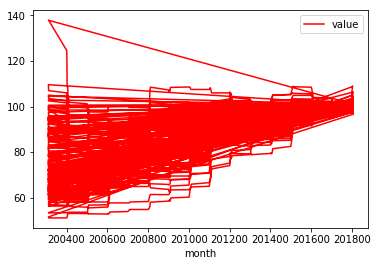

In [33]:
# import matplotlib.pyplot as plt
# df.plot(kind='line',x='month',y='value',color='red')
# plt.rcParams['figure.figsize'] = [20, 8]
# plt.show()

In [35]:
# !git add -A 
# !git commit -a -m "from jupyter notebook"
# !git push

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 07269da] from jupyter notebook
 2 files changed, 285 insertions(+), 17909 deletions(-)
 rewrite real_estate_transaction_price_index_present_condition/.ipynb_checkpoints/[OpenAPI] real_estate_transaction_price_index_present_condition-checkpoint.ipynb (98%)


To https://bitbucket.org/jaehaklee1984/aucq-openapi.git
   9a9dc84..07269da  master -> master


In [ ]:
# dom = xml.dom.minidom.parseString(response.text) # or xml.dom.minidom.parseString(xml_string)
# pretty_xml_as_string = dom.toprettyxml()
# print(pretty_xml_as_string)

# works!
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

#df.tail()
